<a href="https://colab.research.google.com/github/O-orion/xgboost-depressao/blob/main/IA_depressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost scikit-learn

# 1 ETAPA - Pré-processamento dos Dados

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv("train.csv")

In [47]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [48]:
df.dtypes.value_counts()

,count
object,10
float64,8
int64,2


In [49]:
df.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [50]:
df['Job Satisfaction'] = df['Job Satisfaction'].fillna(df['Job Satisfaction'].median())
df['Study Satisfaction'] = df['Study Satisfaction'].fillna(df['Study Satisfaction'].median())
df['CGPA'] = df['CGPA'].fillna(df['CGPA'].median())
df['Profession'] = df['Profession'].fillna("unknow")
df['Work Pressure'] = df['Work Pressure'].fillna(-1)
df['Academic Pressure'] = df['Academic Pressure'].fillna(-1)

In [51]:
df = df.dropna()

In [52]:
df = df.drop(columns=['id','City', 'Name'])

In [53]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [54]:
family_encoder = LabelEncoder()
pensamento_encoder = LabelEncoder()
ocupacao_encoder = LabelEncoder()
genero_encoder = LabelEncoder()

X['Have you ever had suicidal thoughts ?'] = pensamento_encoder.fit_transform(X['Have you ever had suicidal thoughts ?'])
X['Family History of Mental Illness'] = family_encoder.fit_transform(X['Family History of Mental Illness'])
X['Working Professional or Student'] = ocupacao_encoder.fit_transform(X['Working Professional or Student'])
X['Gender'] = genero_encoder.fit_transform(X['Gender'])

In [55]:
X

,Gender,Age,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,49.0,1,Chef,-1.0,5.0,7.77,3.0,2.0,More than 8 hours,Healthy,BHM,0,1.0,2.0,0
1,1,26.0,1,Teacher,-1.0,4.0,7.77,3.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,0
2,1,33.0,0,unknow,5.0,-1.0,8.97,2.0,3.0,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,0
3,1,22.0,1,Teacher,-1.0,5.0,7.77,3.0,1.0,Less than 5 hours,Moderate,BBA,1,10.0,1.0,1
4,0,30.0,1,Business Analyst,-1.0,1.0,7.77,3.0,1.0,5-6 hours,Unhealthy,BBA,1,9.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,18.0,1,unknow,-1.0,5.0,7.77,3.0,4.0,5-6 hours,Unhealthy,Class 12,0,2.0,4.0,1
140696,0,41.0,1,Content Writer,-1.0,5.0,7.77,3.0,4.0,7-8 hours,Moderate,B.Tech,1,6.0,5.0,1
140697,0,24.0,1,Marketing Manager,-1.0,3.0,7.77,3.0,1.0,More than 8 hours,Moderate,B.Com,0,4.0,4.0,0
140698,0,49.0,1,Plumber,-1.0,5.0,7.77,3.0,2.0,5-6 hours,Moderate,ME,1,10.0,1.0,0


In [56]:
one_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoder_data = one_encoder.fit_transform(X[['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree']])

features_names = one_encoder.get_feature_names_out(['Profession', 'Sleep Duration', 'Dietary Habits','Degree'])

encoder_df = pd.DataFrame(encoder_data, columns=features_names, index=X.index)

X = X.drop(columns=['Profession', 'Sleep Duration', 'Dietary Habits','Degree'])

X = pd.concat([X, encoder_df], axis=1)

X = X.dropna(subset=['Gender', 'Age', 'Working Professional or Student',
                     'Academic Pressure', 'Work Pressure', 'CGPA',
                     'Study Satisfaction', 'Job Satisfaction',
                     'Have you ever had suicidal thoughts ?',
                     'Work/Study Hours', 'Financial Stress',
                     'Family History of Mental Illness'])


In [57]:
X

,Gender,Age,Working Professional or Student,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_Ritik,Degree_S.Arch,Degree_S.Pharm,Degree_S.Tech,Degree_UX/UI Designer,Degree_Unite,Degree_Veda,Degree_Vivaan,Degree_Vrinda,Degree_Working Professional
0,0,49.0,1,-1.0,5.0,7.77,3.0,2.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,26.0,1,-1.0,4.0,7.77,3.0,3.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,33.0,0,5.0,-1.0,8.97,2.0,3.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,22.0,1,-1.0,5.0,7.77,3.0,1.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,30.0,1,-1.0,1.0,7.77,3.0,1.0,1,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,18.0,1,-1.0,5.0,7.77,3.0,4.0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140696,0,41.0,1,-1.0,5.0,7.77,3.0,4.0,1,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140697,0,24.0,1,-1.0,3.0,7.77,3.0,1.0,0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140698,0,49.0,1,-1.0,5.0,7.77,3.0,2.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
feature_names = X.columns.tolist()
scaler = StandardScaler()

X = scaler.fit_transform(X)

# 2 ETAPA - Criando e Treinando o Modelo

In [59]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [60]:
modelo = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
    )

modelo.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [22:30:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

# 3 ETAPA - Visualizando Resultado

In [67]:
y_pred = modelo.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9396545596701968

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     23025
           1       0.84      0.82      0.83      5113

    accuracy                           0.94     28138
   macro avg       0.90      0.89      0.90     28138
weighted avg       0.94      0.94      0.94     28138



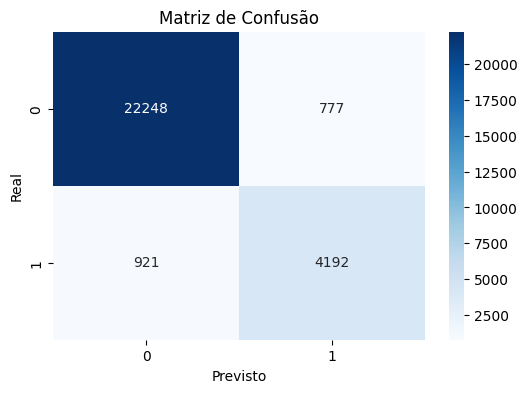

In [63]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


In [64]:
importances = modelo.feature_importances_

In [65]:
df_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


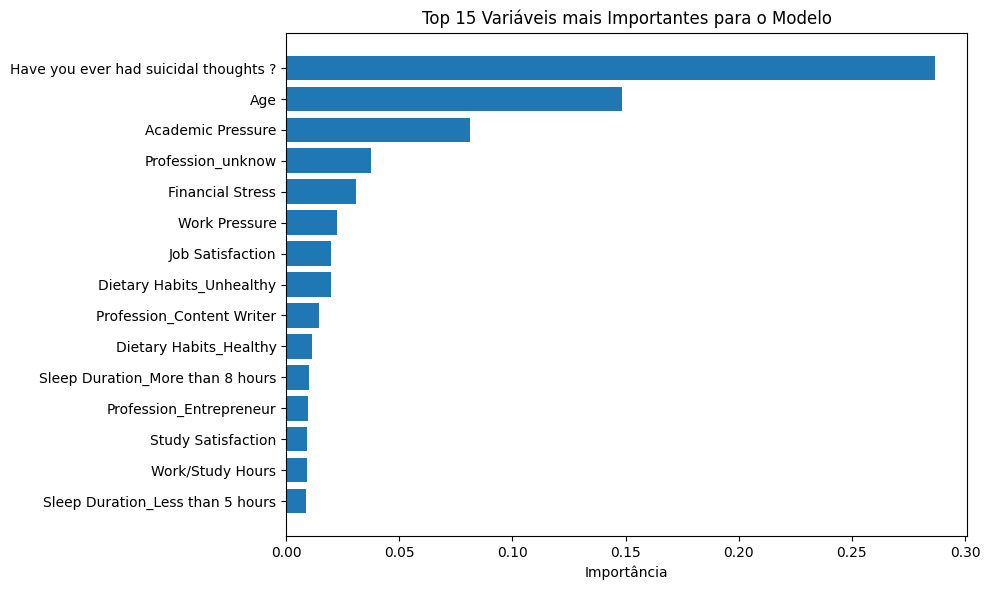

In [66]:
df_importances = df_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(df_importances['Feature'][:15][::-1], df_importances['Importance'][:15][::-1])
plt.title("Top 15 Variáveis mais Importantes para o Modelo")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()


## Conclusão

O modelo XGBoost atingiu 93,96% de acurácia geral, com ótima performance em identificar indivíduos sem sintomas de depressão. Apesar disso, 18% dos casos de depressão passaram despercebidos (falsos negativos). Esse é um ponto de atenção, pois em saúde mental é preferível errar por excesso (falsos positivos) do que por omissão.